In [1]:
#imports para trazer os dados das materias
import pandas as pd 
import spacy
import bs4 
from bs4 import BeautifulSoup 
import urllib.request as urllib_request
from urllib.request import urlopen
import numpy as np
import nltk

#imports para fazer a nuvem de palavras
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize

In [2]:
#Conexao com a base de dados
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
db = client.sprint3
materia_no_banco = db.materia

In [3]:
#Funcao para gerar a word cloud
def wordcloud_artigo(artigo):
    #Define palavras irrelevantes para a analise 
    palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
    
    #Tokeniza por espaco
    token_espaco = tokenize.WhitespaceTokenizer()
    
    #Verifica se as palavras são uteis no artigo e cria uma nova coluna 'tratamento_1' com os resultados
    frase_processada = list()
    for texto in artigo.texto_completo:
        nova_frase = list()
        palavras_texto = token_espaco.tokenize(texto)
        for palavra in palavras_texto:
            if palavra not in palavras_irrelevantes:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))        
    artigo["tratamento_1"] = frase_processada
    
    #Plota a Word Cloud
    todas_palavras = ' '.join([texto for texto in artigo.tratamento_1])
    nuvem_palvras = WordCloud(width= 500, height= 300, max_font_size = 110, collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.title(f'{artigo.titulo[0]}')
    plt.axis("off")
    plt.show()                


Essa matéria ja existe no Banco: - 1971: Ofensiva de guerrilheiros no Camboja deixa 200 mortos


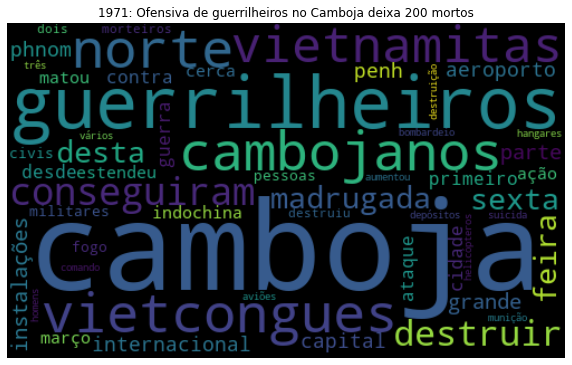

Essa matéria ja existe no Banco: - 1971: Embaixador diz que, durante seu sequestro, lia notícias da negociação


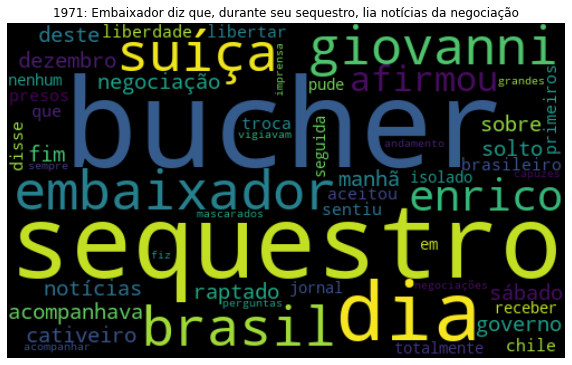

Essa matéria ja existe no Banco: - 1971: Lista de presos que serão trocados por embaixador está completa


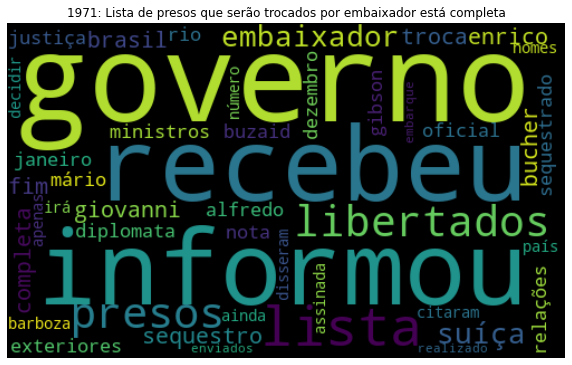

Essa matéria ja existe no Banco: - 1970: Grande incêndio destrói ala da Volkswagen em São Bernardo


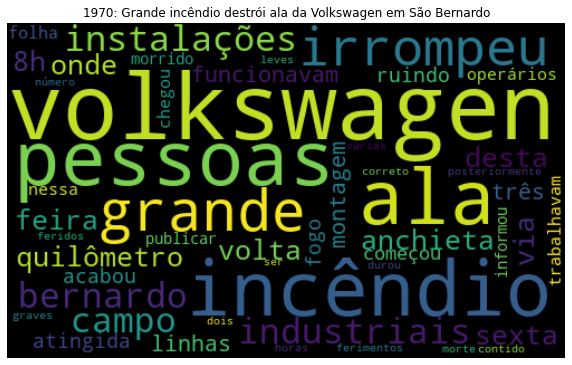

Essa matéria ja existe no Banco: - 1970: Embaixador da Suíça no Brasil é sequestrado no Rio de Janeiro


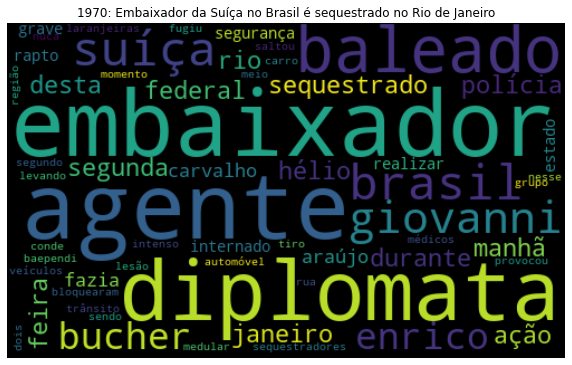

Essa matéria ja existe no Banco: - 1921: Serviço Sanitário não fala em caso fatal de meningite em boletins


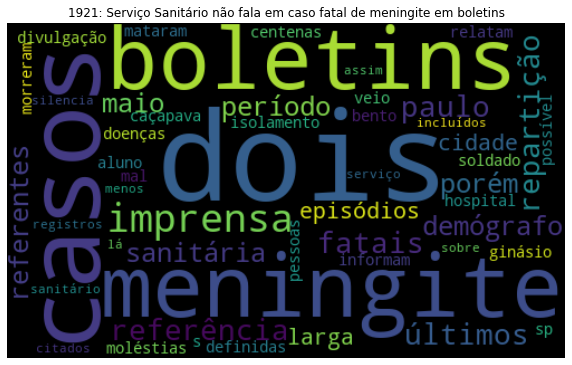

Essa matéria ja existe no Banco: - 1921: Com matança de gado em São Paulo, risco de escassez de leite preocupa


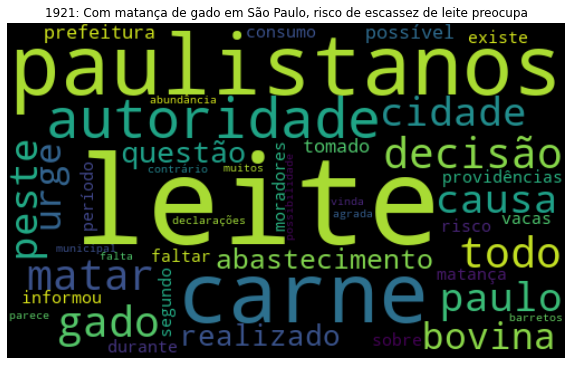

Essa matéria ja existe no Banco: - 1921: Governo pretende iniciar a cobrança do imposto sobre jogos em cassinos


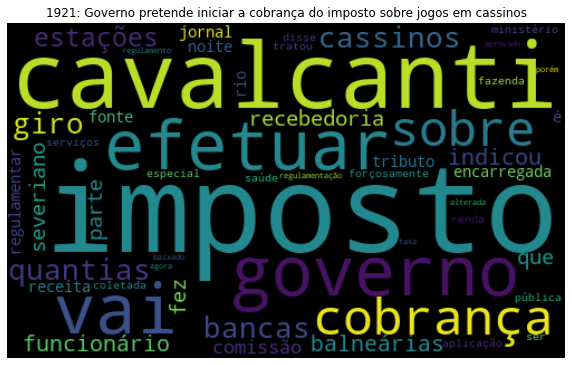

Essa matéria ja existe no Banco: - 1921: Aviador Orton Hoover bate recorde ao fazer travessia SP-RJ em 2h15


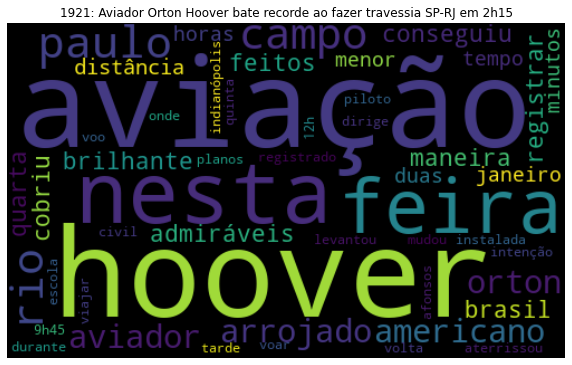

Essa matéria ja existe no Banco: - 1921: Preços do feijão e de outros alimentos sobem durante peste bovina


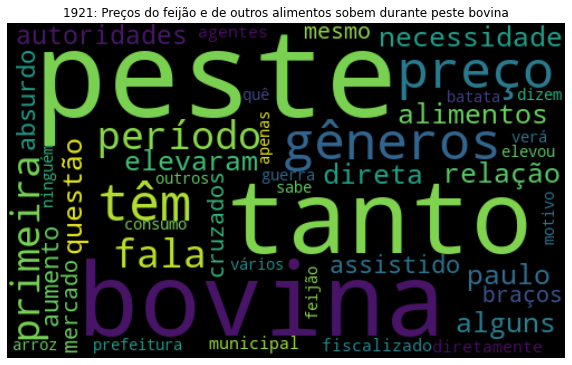

Essa matéria ja existe no Banco: - 1968: Governo federal baixa AI-5 e decreta fechamento do Congresso Nacional


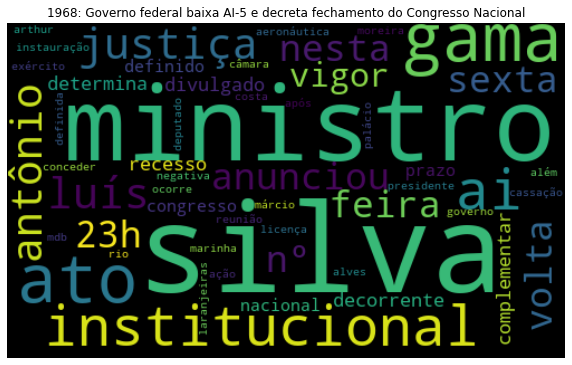

In [4]:
arquivo = open('link_das_materias.txt','r')
#Iterando cada link do arquivo para retirar os dados das materias
for link in arquivo:
    #Pegando o conteudo
    url = link
    response = urlopen(url)
    html = response.read()
    html = html.decode('utf-8')
    
    #Usando o BeautifulSoup para trabalhar com o conteudo
    soup = BeautifulSoup(html, 'html.parser')

    #Pegando titulo da materia
    titulo_materia = soup.find('h1', {"class": "c-content-head__title"}).get_text()
    titulo_materia = " ".join(titulo_materia.split())

    #Pegando os paragrafos da materia
    materia = soup.find('div', {'class': "c-news__body"}).findAll('p')
    paragrafos = []
    for paragrafo in materia:
        paragrafos.append(paragrafo.get_text())

    #Verificando se há as materias no banco e as inserindo se nao houver
    materia_para_o_banco = {
        'Titulo': titulo_materia,
        'Conteudo': paragrafos
    }
    materia_no_banco = db.Materias
    if not materia_no_banco.find_one({'Titulo': titulo_materia}):       
        insere = materia_no_banco.insert_one(materia_para_o_banco)
        print(f"Inserindo a materia: - {titulo_materia}")
    else:
        print(f'Essa matéria ja existe no Banco: - {titulo_materia}')

    #Plotando a Word Cloud
    texto_completo = " ".join(paragrafos)
    artigo = pd.DataFrame({
        'titulo': titulo_materia,
        'texto_completo': texto_completo.lower()
    },index=[0])
    wordcloud_artigo(artigo)
    

    